## Segmentação por bordas - CANNY
***

![img](https://user-images.githubusercontent.com/14116020/54875452-668b6280-4dde-11e9-9d39-829f5cdf1b7a.png)

Um dos métodos mais eficiêntes para detecção de bordas, por meio dele é possível localizar e realçar melhor as bordas de uma imagem.

A abordagem de CANNY baseia-se em 3 objetos básicos:

* Baixa taxa de error, ou seja, as bordas detectadas devem ser o mais próximo possível das verdadeiras


* Os pontos das bordas devem estar bem localizadas, ou seja, ao detectar uma possível borda a distância dessa borda detectada para a verdadeira deve ser o mínimo possível.


* Resposta de um único ponto de borda, ou seja, o número máximo de locais em torno de uma borda verdadeira deve ser o mínimo.

Etapas:

1. **Redução de ruídos** - Filtro Gaussiano
2. **Gradiente de intensidade da imagem**

$$G = \sqrt{G^2_x + G^2_y}$$

$$ \theta = tan^{-1}\left(\frac{G_y}{G_x}\right)$$

3. **Supressão não máxima**: depois de obter a magnitude e a direção do gradiente, uma varredura na imagem é feita para remover os pixels indesejados que pode não construir a borda.

![img](https://user-images.githubusercontent.com/14116020/54875555-4c528400-4de0-11e9-950a-cd5ec100d6dd.png)

O ponto A está na borda, na direção vertical, a direção do gradiente é normal para esse borda, os pontos B e C estão nas direções do gradiente, então o ponto A é verificado com os pontos B e C para ver se eles formam o máximo local, se assim for é considerado para a próxima etapa, caso contrário é suprimido tornando-se igual a zero. O resultado obtido é uma imagem binária com arestas finas.

4. **Limiar de Histerese**: Este estágio decide quais são os pontos que são realmente bordas e quais não são. Para isso precisamos de 2 valores (maxVal e o minVal). Qualquer borda com gradiente de intensidade maior que o maxVal são com certeza bordas e os abaixo do minVal com certeza não são bordas, portanto serão descartadas.

![img](https://user-images.githubusercontent.com/14116020/54875599-c8e56280-4de0-11e9-99bd-ac6244d4e963.png)

Aqueles que se encontram entre os dois lineares são classificadas como bordas ou não bordas com base em sua conectividade. Se eles tiverem conectados a pixels seguros (bordas acima do maxVal) eles serão considerados parte da borda, caso contrario eles também serão descartados.

A bordar A estã acima do maxVal então é considerado uma borda segura, Embora a borda C esteja abaixo do maxVal ela está conectada a borda A, de modo que também é considerada uma borda valida, mas a borda B, embora esteja acima do minVal não é conectada a nenhuma borda segura, ou seja, é descartada.

```py
def Canny(img, minVal, maxVal):
    img = Imagem com a qual queremos trabalhar em tons de cinza
    minVal = Valor mínimo
    maxVal = Valor máximo
    
    return Imagem com bordas detectadas
```

Exemplo:

![img](https://user-images.githubusercontent.com/14116020/54875698-5e352680-4de2-11e9-8631-ffcc97355f71.png)

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread("./Imagens/cafe.jpg", cv.IMREAD_GRAYSCALE)

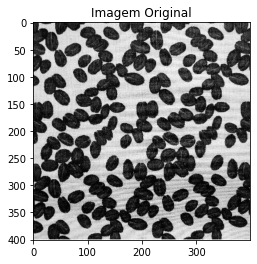

In [3]:
img_gray = cv.cvtColor(img, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem Original")
plt.show()

In [4]:
img_gauss = cv.GaussianBlur(img, (5, 5), 0)

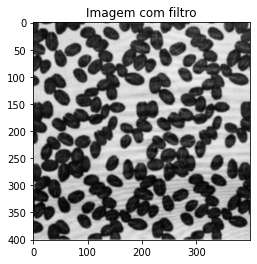

In [5]:
img_gray = cv.cvtColor(img_gauss, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem com filtro")
plt.show()

In [6]:
metodo = cv.THRESH_BINARY_INV + cv.THRESH_OTSU

In [7]:
limiar, img_binario = cv.threshold(img, 200, 255, metodo)

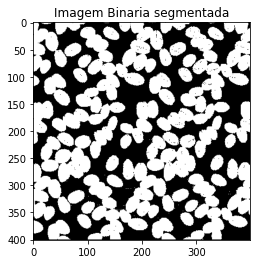

In [8]:
img_gray = cv.cvtColor(img_binario, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem Binaria segmentada")
plt.show()

In [9]:
img_segmentada = cv.Canny(img_binario, 100, 200)

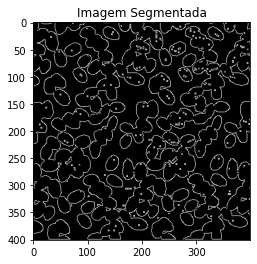

In [10]:
img_gray = cv.cvtColor(img_segmentada, cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.title("Imagem Segmentada")
plt.show()